In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    funct =  np.exp(x[0] + 3.0*x[1] - 0.1) + np.exp(x[0] - 3.0*x[1] - 0.1) + np.exp(-x[0] - 0.1)
    return funct

In [3]:
def derivative(x):
    a =  np.exp(x[0] + 3.0*x[1] - 0.1) + np.exp(x[0] - 3.0*x[1] - 0.1) - np.exp(-x[0] - 0.1)
    b =  3.0*np.exp(x[0] + 3.0*x[1] - 0.1) + (-3.0)*np.exp(x[0] - 3.0*x[1] - 0.1)
    return np.array([a, b])   

In [4]:
def hess(x):
    dxx = np.exp(x[0] + 3.0*x[1] - 0.1) + np.exp(x[0] - 3.0*x[1] - 0.1) + np.exp(-x[0] - 0.1)
    dxy = 3.0*np.exp(x[0] + 3.0*x[1] - 0.1) + (-3.0)*np.exp(x[0] - 3.0*x[1] - 0.1)
    
    dyx = 3.0*np.exp(x[0] + 3.0*x[1] - 0.1) + (-3.0)*np.exp(x[0] - 3.0*x[1] - 0.1)
    dyy = 9.0*np.exp(x[0] + 3.0*x[1] - 0.1) + (9.0)*np.exp(x[0] - 3.0*x[1] - 0.1)
    hessian = np.array([[dxx,dxy],[dyx,dyy]])
    hessian = hessian.reshape(2,2)
    return hessian    

# Armijo

In [5]:
def armijo(point, direction, n):
    #beta = random.random()
    #sigma = random.uniform(0, .5)
    beta = 0.25
    sigma = 0.25
    (i, iter_conv) = (1, 0)
    conval = 0
    while i <= n:
        leftf = func(point+np.power(beta, i)*direction)
        rightf = func(point) + sigma*np.power(beta, i)*np.dot(derivative(point).T,direction)
        if leftf-rightf <= 0:
            iter_conv = i
            conval =np.power(beta, iter_conv)
            break
        i += 1
    return conval


# Newton's

In [9]:
def newton(x, maximum_iterations):
    i = 1
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while i <= maximum_iterations:
        vals.append(x)
        #objectfs.append(func(x))
        gradient = derivative(x)
        gradient= gradient.reshape(len(gradient),1)
        Hessian_matrix = hess(x)
        invhess =  np.linalg.inv(Hessian_matrix)
        direction = -np.dot(invhess, gradient)
        max_iter = 10
        step= armijo(x, direction, max_iter)
       
        temp = x-step*(np.dot(invhess, gradient))
        
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        #print(x, func(x), miter)
        i += 1
    return vals, objectfs, i,x

In [10]:
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
starting_point.shape
maximum_iterations = 20
vals, objectfs, iterations,final = newton(starting_point, maximum_iterations)
print(final,iterations)

0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
0.25
(array([[-0.33978968],
       [ 0.05037511]]), 18)


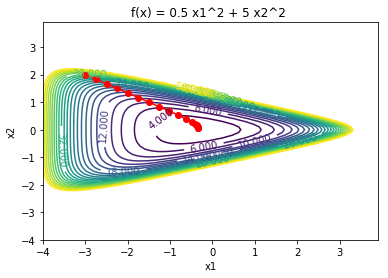

In [8]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)

f_mesh = np.exp(x1_mesh + 3.0*x2_mesh - 0.1) + np.exp(x1_mesh - 3.0*x2_mesh - 0.1) + np.exp(-x1_mesh - 0.1)
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Conjugate

In [148]:
def conjugate_grad(point, n):
    i = 0
    grad = np.array([0, 0])
    old_grad = np.array([0, 0])
    beta = 0.25
    sigma = 0.25
    vals = []
    while i <= n:
        grad = derivative(point)
        #print(grad.shape)
        vals.append(point)
        if i == 0:
            d = -grad
            #print(d.shape)
        else: 
            beta = np.dot(grad.T, grad)/np.dot(old_grad.T, old_grad)
            d = -grad + beta*old_grad
            #print(d.shape)
        direction = d
        iterations = 20
        #print(point.shape)
        step = armijo(point, direction, iterations)
        
        point = point + step*d
        old_grad = grad
        old_d = d
        i = i+1
    return vals, point, i

In [149]:
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
maximum_iterations = 20

vals, final, iterations= conjugate_grad(starting_point, maximum_iterations,  )
iterations

21

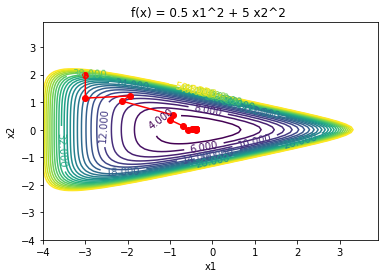

In [150]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = np.exp(x1_mesh + 3.0*x2_mesh - 0.1) + np.exp(x1_mesh - 3.0*x2_mesh - 0.1) + np.exp(-x1_mesh - 0.1)
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('f(x) = 0.5 x1^2 + 5 x2^2 ')
plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Steepest

In [151]:
def steepest(point, max_iteration):
    val = []
    for i in range(max_iteration):
        grad = derivative(point)
        val.append(point)
        direction = -grad
        iterations = 20
        step = armijo(point, direction, iterations)
        point = point - (step*grad)
    return val, point, i


In [152]:
max_iterations = 8
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
vals, final, iterartions = steepest(starting_point, max_iterations)
final

array([[-0.39660955],
       [-0.03653157]])

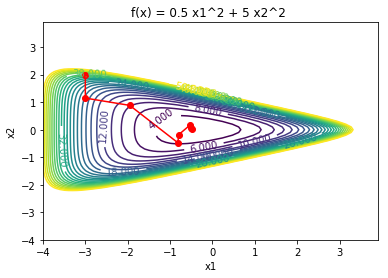

In [153]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = np.exp(x1_mesh + 3.0*x2_mesh - 0.1) + np.exp(x1_mesh - 3.0*x2_mesh - 0.1) + np.exp(-x1_mesh - 0.1)
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('f(x) = 0.5 x1^2 + 5 x2^2 ')
plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Quassi Newton BFGS

In [154]:
def qNewton1(pt, n):
    intial_hesse = [[1.0, 0.0],[0.0, 1.0]]
    old_pt = pt
    vals = []
    for i in range(n):
        old_grad = derivative(old_pt)
        vals.append(old_pt)
        inverse = np.linalg.inv(intial_hesse)
        direction = np.dot(-inverse.T, old_grad)
        iterations = 400
        step = armijo(old_pt,direction, iterations)
        delta_x = -np.dot(step,np.linalg.solve(intial_hesse,old_grad))
        #print(delta_x.shape)
        new_pt = old_pt + delta_x
        new_grad = derivative(new_pt)
        y = new_grad - old_grad
        if np.dot(y.T,delta_x)>0:
            A = np.dot(y,y.T)
            B = np.dot(y.T,delta_x).item()
            #print(part2)
            AB = A/B
            #print(part3.shape)
            C = np.dot(intial_hesse, delta_x)
            D = np.dot(C,C.T)
            E = np.dot(np.dot(delta_x.T,intial_hesse),delta_x)
            #print(part6.shape)
            DE = D/E
            intial_hesse = intial_hesse + AB - DE
            old_pt = new_pt
        else: 
            break
    return vals, old_pt, i

In [160]:
max_iterations = 50
starting_point = [3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
vals, final,iterations = qNewton1(starting_point, max_iterations)
iterations

C:\Users\MOHIT\Anaconda3\envs\Diksha_pyhton2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


49

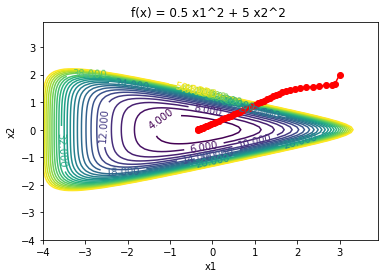

In [156]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh =  np.exp(x1_mesh + 3.0*x2_mesh - 0.1) + np.exp(x1_mesh - 3.0*x2_mesh - 0.1) + np.exp(-x1_mesh - 0.1)
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('f(x) = 0.5 x1^2 + 5 x2^2 ')
plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')